Carregar os dados disponíveis em https://brasil.io/dataset/covid19/files/

(https://data.brasil.io/dataset/covid19/caso_full.csv.gz)

https://github.com/turicas/covid19-br/blob/master/api.md#boletim (descrição dos dados)

Analisar os dados e desenvolver uma documentação baseada na seguinte estrutura

Introdução

Objetivo

Metodologia

Resultados

Conclusão


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Introdução**



In [ ]:
# Importação das bibliotecas necessárias

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests as re
import json

**1. Introdução**

A pandemia de COVID-19, declarada pela Organização Mundial da Saúde em 11 de março de 2020, representou um dos maiores desafios sanitários e sociais da história moderna. No Brasil, a resposta à crise foi caracterizada por uma abordagem descentralizada, com estados e municípios adotando diferentes estratégias de contenção, incluindo medidas de distanciamento social e "lockdowns" em períodos críticos. A eficácia e o impacto dessas medidas na progressão da doença são temas de intenso debate e análise.


Este projeto de ciência de dados busca utilizar dados públicos de saúde para investigar a trajetória da pandemia no Brasil, com um foco especial na análise comparativa da evolução de casos durante os períodos de maior restrição de circulação. Através da coleta, tratamento e visualização de dados, pretendemos quantificar as tendências e padrões da disseminação do vírus, oferecendo uma perspectiva baseada em evidências sobre o impacto dessas intervenções.

**2. Objetivos**

O principal objetivo deste estudo é analisar e comparar a dinâmica dos casos de COVID-19 em diferentes fases da pandemia no Brasil. Os objetivos específicos são:


Mapear a Evolução Geral: Analisar a série temporal de casos de COVID-19 durante todo o período da pandemia (março de 2020 a maio de 2023), identificando picos, vales e as principais "ondas" da doença.

Análise Comparativa de Lockdown: Isolar os períodos de lockdown mais severos (principalmente entre março-julho de 2020 e março-maio de 2021) e comparar a taxa de crescimento de casos durante esses intervalos com os períodos de maior flexibilização.

Visualização de Insights: Desenvolver visualizações claras e informativas, como gráficos de linha e barras, que comuniquem de forma eficaz as tendências encontradas, permitindo uma compreensão visual do impacto das medidas de contenção.

**3 Metodologia**

**3.1 - Coleta e Preparação dos Dados**

3.1.1 - Carregamento dos Dados

- Utilizaremos a biblioteca pandas para executar a coleta dos dados, com base no arquivo caso_full.csv.gz
- Verificar a integridade dos Dados

3.1.2 - Transformação dos Dados

Para melhor compreensão dos dados serão executados os seguintes tratamentos

- city_ibge_code -> int
- date -> datetime
- epidemiological_week -> object
- estimated_population -> int
- estimated_population_2019 -> int
- last_available_confirmed_per_100k_inhabitants -> int
- last_available_date -> datetime

Os dados serão filtrados considerando 4 capitais do Brasil, para efeito de comparação, sendo elas:

- São Paulo
- Rio de Janeiro
- Brasília
- Belo Horizonte

3.1.3 - Criação de Variáveis

Geração de uma variável de média móvel de 7 dias para suavização das curvas de evolução, com base na coluna new_confirmed

3.2 - Análise Exploratória Geral

Essa etapa tem como objetivo entender o comportamento da evolução da pandemia nas capitais selecionadas

3.2.1 - Visualização de Séries Temporais

- Será gerado um gráfico de linha com base na variável new_confirmed_mm, mostrando a evolução dos casos para os dados brutos e a variável de média móvel para cada capital.

- Será gerado um gráfico de linha com base na variável new_confirmed_mm, comparando a evolução dos casos para os dados brutos e a viriável de média móvel com todos as capitais.

- Será gerado um gráfico de linhas comparando o crescimento da variável new_confirmed_mm com o crescimento da variável new_deaths_mm.

- Será gerado um gráfico de comparação para o crescimento de casos e óbitos em relação a população de cada cidade.

- Será gerado um gráfico isolando os periódos de lockdown decretados em cada cidade.

    **São Paulo (SP)**

    1ª Onda (2020): Início em 24 de março de 2020, com flexibilização gradual a partir do início de junho de 2020.

    2ª Onda (2021): Início em 15 de março de 2021, com flexibilização a partir de 18 de abril de 2021.

    **Rio de Janeiro (RJ)**
    
    1ª Onda (2020): Início em 24 de março de 2020, com flexibilização gradual a partir do início de junho de 2020.

    2ª Onda (2021): Início em 26 de março de 2021, com flexibilização a partir de 05 de abril de 2021.

    **Brasília (DF)**
    
    1ª Onda (2020): Início em 19 de março de 2020, com flexibilização gradual a partir do final de abril de 2020.

    2ª Onda (2021): Início em 28 de fevereiro de 2021, com flexibilização a partir do final de março de 2021.

    **Belo Horizonte (BH)**
    
    1ª Onda (2020): Início em 20 de março de 2020, com flexibilização gradual a partir do início de agosto de 2020.

    2ª Onda (2021): Início em 06 de março de 2021, com flexibilização a partir de 22 de abril de 2021.

- Será gerado um gráfico da evolução dos casos após os períodos de flexibilização (os três meses seguintes a flexibilização).

- Será gerado um gráfico com a taxa de óbitos por 100.000 habitantes, verificando proporcionalmente.

3.3 - Visualização de Resultados e Conclusões

Essa seção terá como objetivo responder as seguintes perguntas:

- Qual capital apresentou os maiores picos de casos?

- As ondas de picos ocorreram simultaneamente nas 4 cidades?

- Houve redução de casos nos períodos de lockdown?

- Qual cidade teve a mais rápida redução de casos nos períodos de restrição?

In [ ]:
# Acesso dos dados necessários para execução do projeto

data = pd.read_csv('https://data.brasil.io/dataset/covid19/caso_full.csv.gz', compression='gzip')
data.head()

# Filtro das cidades de interesse
list_cidades = ['São Paulo', 'Rio de Janeiro', 'Brasília', 'Belo Horizonte']

data_filtered = data[data['city'].isin(list_cidades)]
data_filtered.head()

# Transformação dos tipos de dados das colunas

data_filtered['city_ibge_code'] = data_filtered['city_ibge_code'].astype(int)
data_filtered['date'] = pd.to_datetime(data_filtered['date'])
data_filtered['epidemiological_week'] = data_filtered['epidemiological_week'].astype(object)
data_filtered['estimated_population'] = data_filtered['estimated_population'].astype(int)
data_filtered['estimated_population_2019'] = data_filtered['estimated_population_2019'].astype(int)
data_filtered['last_available_confirmed_per_100k_inhabitants'] = data_filtered['last_available_confirmed_per_100k_inhabitants'].astype(int)
data_filtered['last_available_date'] = pd.to_datetime(data_filtered['last_available_date'])


# Criação da variável de média móvel para 7 dias

data_filtered['new_confirmed_mm'] = data_filtered['new_confirmed'].rolling(window=7).mean()

data_filtered['new_deaths_mm'] = data_filtered['new_deaths'].rolling(window=7).mean()

data_filtered['last_available_confirmed_mm'] = data_filtered['last_available_confirmed'].rolling(window=7).mean()

data_filtered['last_available_deaths_mm'] = data_filtered['last_available_deaths'].rolling(window=7).mean()

# Filtragem das colunas de interesse

data_filtered = data_filtered.loc[:, ['city', 'date', 'epidemiological_week', 'estimated_population', 'new_confirmed', 'new_confirmed_mm',
                                      'new_deaths', 'new_deaths_mm', 'last_available_confirmed', 'last_available_confirmed_mm', 'last_available_deaths', 'last_available_deaths_mm', 'is_repeated']]

data_filtered = data_filtered[data_filtered['is_repeated'] == False]
data_filtered





/tmp/ipython-input-1549681183.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered['city_ibge_code'] = data_filtered['city_ibge_code'].astype(int)
/tmp/ipython-input-1549681183.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered['date'] = pd.to_datetime(data_filtered['date'])
/tmp/ipython-input-1549681183.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in t

,city,date,epidemiological_week,estimated_population,new_confirmed,new_confirmed_mm,new_deaths,new_deaths_mm,last_available_confirmed,last_available_confirmed_mm,last_available_deaths,last_available_deaths_mm,is_repeated
564443,Brasília,2020-03-07,202010,3055149,1,NaN,0,NaN,1,NaN,0,NaN,False
564445,Brasília,2020-03-08,202011,3055149,0,NaN,0,NaN,1,NaN,0,NaN,False
564447,Brasília,2020-03-09,202011,3055149,0,NaN,0,NaN,1,NaN,0,NaN,False
564449,Brasília,2020-03-10,202011,3055149,0,NaN,0,NaN,1,NaN,0,NaN,False
564451,Brasília,2020-03-11,202011,3055149,1,NaN,0,NaN,2,NaN,0,NaN,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3669812,São Paulo,2021-11-11,202145,12325232,439,207.000000,4,9.857143,972286,971567.285714,38897,38874.428571,False
3674341,São Paulo,2021-11-18,202146,12325232,1399,199.857143,171,24.428571,973685,972485.857143,39068,38921.428571,False
3677576,São Paulo,2021-11-23,202147,12325232,828,318.142857,73,34.857143,974513,973603.428571,39141,39054.000000,False
3678223,São Paulo,2021-11-24,202147,12325232,147,339.142857,17,37.285714,974660,973942.571429,39158,39091.285714,False


4 RESULTADOS

Foram gerados os seguintes grupos de gráficos abaixo para analise exploratória geral dos dados, para entendimento do comportamento da evolução da pandemia nas capitais selecionadas.

4.2 - Visualização de Séries Temporais

- Os gráficos abaixo demostram os dados de média e média móvel  a cada 7 dias para cada capital:

- São Paulo: os casos começaram a ser observados com maior frequência em abril de 2020, com os primeiros picos de ocorrência entre os meses de junho a agosto de 2020, após observou-se um queda para baixo de 1.000 casos entre os meses de setembro e novembro, após observou-se uma alta constante nos casos, após o final de ano e fevereiro de 2021, datas marcadas por eventos festivos, como natal, ano novo e carnaval.

- Nas capitais Brasília e Belo Horizonte, observou-se uma desregulação nos dados informados, podendo ser um erro amostral, um erro de disposição dos dados na data correta, ou até mesmo um fato ocorrido nas capitais, no qual iremos observar nos demais gráficos citados.


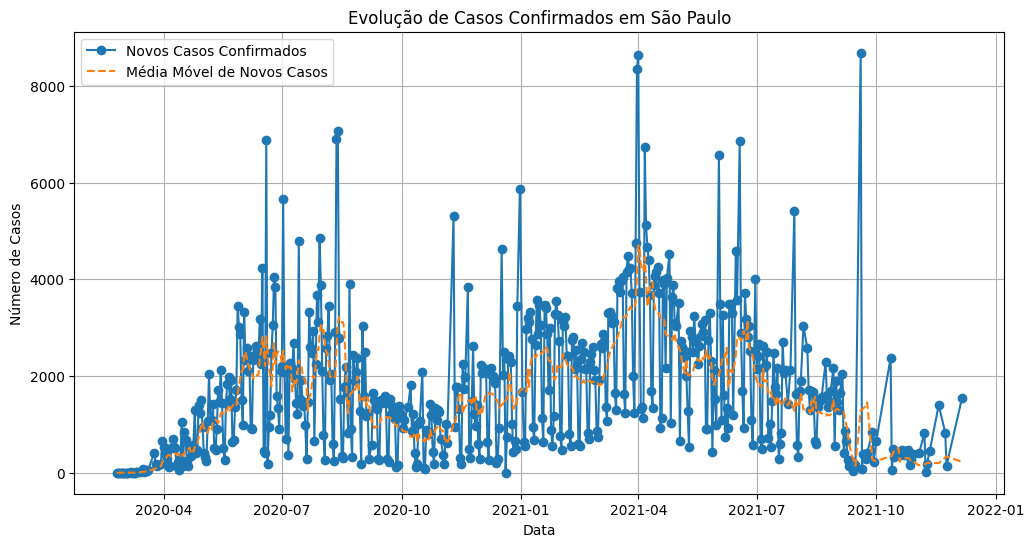

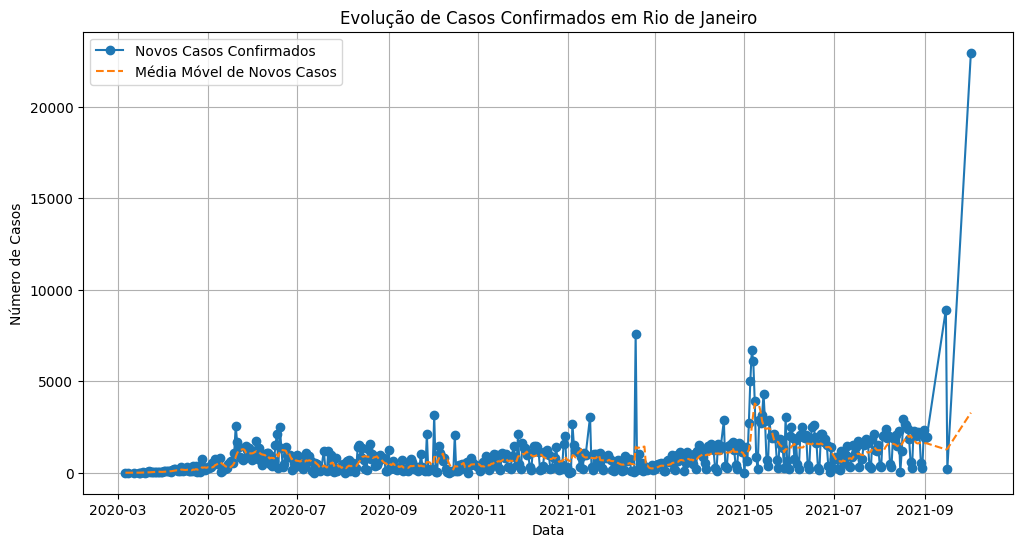

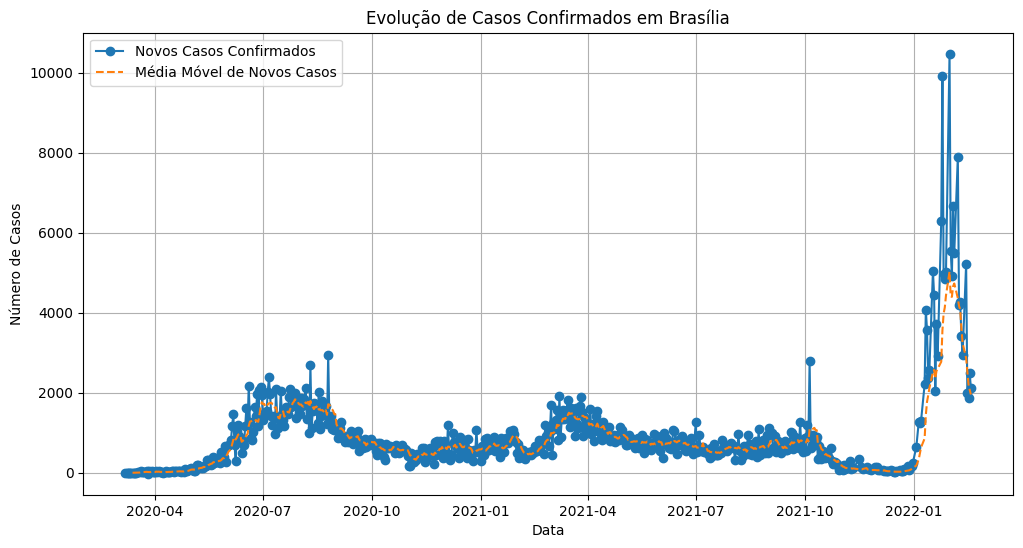

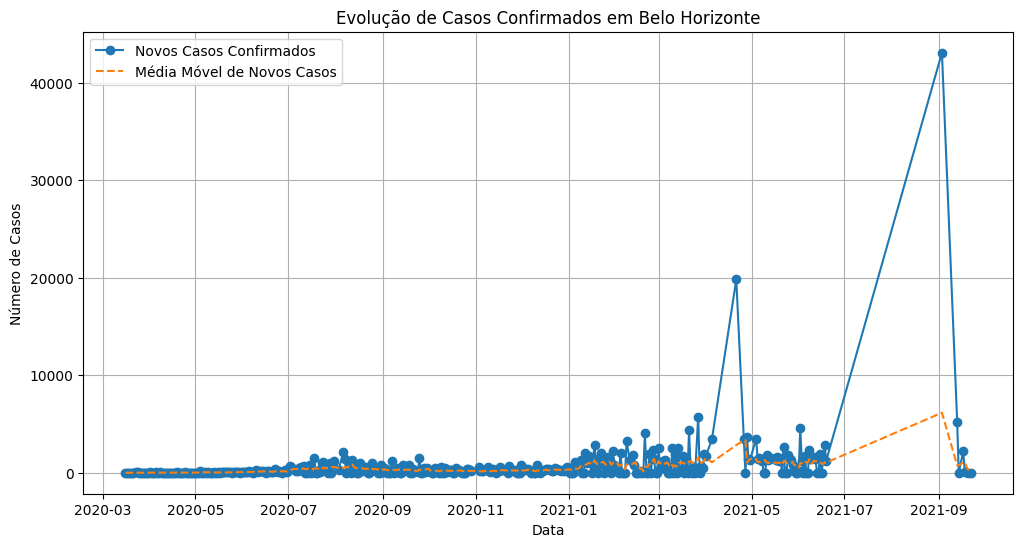

In [ ]:
"""
Será gerado um gráfico de linha com base na variável new_confirmed, mostrando a evolução dos casos para os dados brutos e a variável de média móvel para cada capital.
"""

data_filtered['date'] = pd.to_datetime(data_filtered['date'])
data_filtered = data_filtered.sort_values('date')
data_filtered = data_filtered.set_index('date')


for city in data_filtered['city'].unique():
    plt.figure(figsize=(12, 6))
    city_df = data_filtered[data_filtered['city'] == city]
    city_df = city_df.sort_index()
    plt.plot(city_df.index, city_df['new_confirmed'], label='Novos Casos Confirmados', marker='o')
    plt.plot(city_df.index, city_df['new_confirmed_mm'], label='Média Móvel de Novos Casos', linestyle='--')

    plt.title(f'Evolução de Casos Confirmados em {city}')
    plt.xlabel('Data')
    plt.ylabel('Número de Casos')
    plt.legend()
    plt.grid(True)
    # plt.savefig(f'new_confirmed_{city}.png')
    # plt.close()
    print("==========================================================================")
    plt.show()



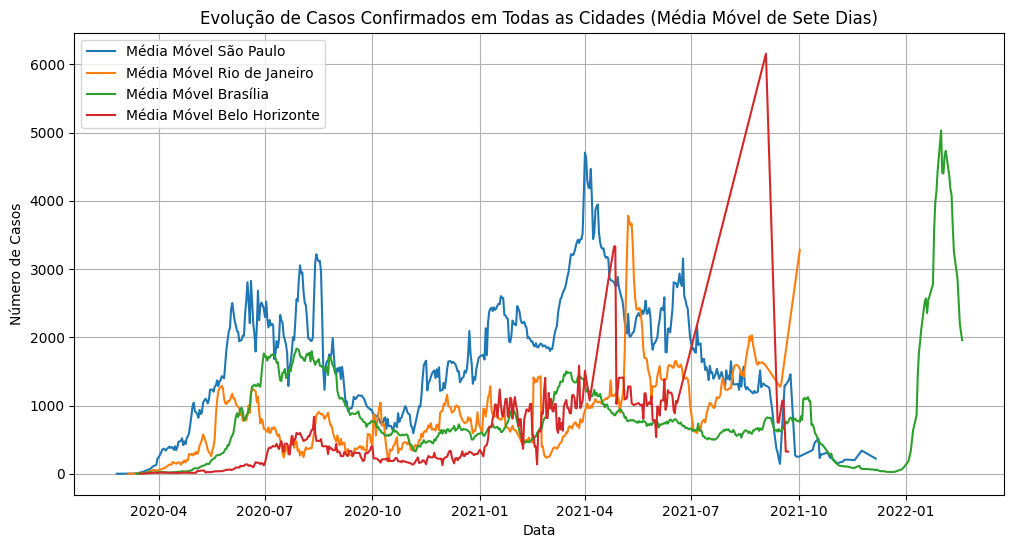

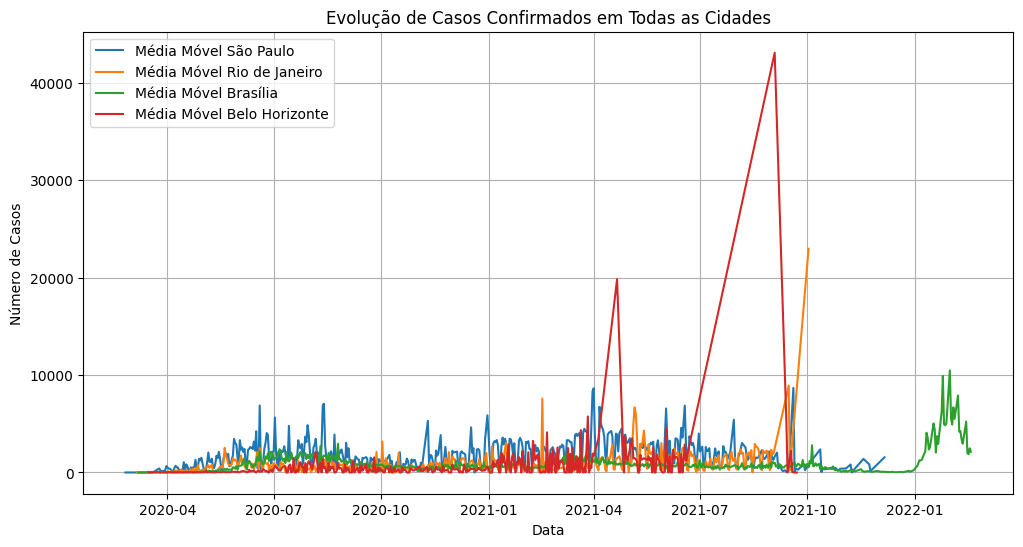

In [ ]:
"""
Será gerado um gráfico de linha com base na variável new_confirmed, comparando a evolução dos casos para os dados brutos e a viriável de média móvel com todos as capitais.
"""

plt.figure(figsize=(12, 6))
for city in data_filtered['city'].unique():
    city_df = data_filtered[data_filtered['city'] == city]
    if len(city_df) > 1:
      plt.plot(city_df.index, city_df['new_confirmed_mm'], label=f'Média Móvel {city}')
    else:
      str_index = city_df.index[0].strftime('%Y-%m-%d')
      plt.plot(str_index, city_df['new_confirmed_mm'], label=f'Média Móvel {city}')



plt.title('Evolução de Casos Confirmados em Todas as Cidades (Média Móvel de Sete Dias)')
plt.xlabel('Data')
plt.ylabel('Número de Casos')
plt.legend()
plt.grid(True)
plt.show()

print("=================================================================================")

plt.figure(figsize=(12, 6))
for city in data_filtered['city'].unique():
    city_df = data_filtered[data_filtered['city'] == city]
    if len(city_df) > 1:
      plt.plot(city_df.index, city_df['new_confirmed'], label=f'Média Móvel {city}')
    else:
      str_index = city_df.index[0].strftime('%Y-%m-%d')
      plt.plot(str_index, city_df['new_confirmed'], label=f'Média Móvel {city}')



plt.title('Evolução de Casos Confirmados em Todas as Cidades')
plt.xlabel('Data')
plt.ylabel('Número de Casos')
plt.legend()
plt.grid(True)
plt.show()

- O gráfico abaixo demostra os dados de média móvel  a cada 7 dias para cada capital:

  - As capitais do Rio de Janeiro e São Paulo se comportaram similares, com exceção aos meses de abril e maio de 2021, no qual a Capital de São Paulo disparou em números de óbitos, ultrapassando a casa dos 200 óbitos no período.

  - E o Rio de Janeiro, que entre os meses de setembro e outubro, apresentou um número maior que as demais capitas.

  - As cidades de Brasilia e Belo Horizante, também apresentaram comportamentos similares, exceto Belo Horizonte com um pico muito alto entre os meses 7 e 9 de 2021, podendo ser um erro nas disposições de dos dados.


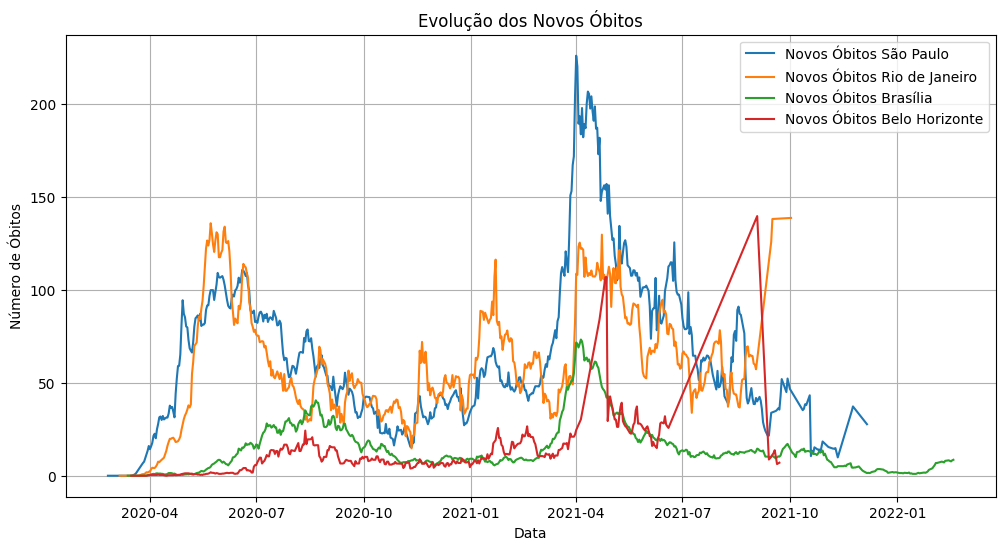

In [ ]:
"""
Será gerado um gráfico de linhas com base na variável new_deaths, mostrando a evolução dos óbitos no periódo.
"""

plt.figure(figsize=(12, 6))
for city in data_filtered['city'].unique():
  city_df = data_filtered[data_filtered['city'] == city]
  if len(city_df) > 1:
    plt.plot(city_df.index, city_df['new_deaths_mm'], label=f'Novos Óbitos {city}')
  else:
    str_index = city_df.index.strftime('%Y-%m-%d')
    plt.plot(str_index, city_df['new_deaths_mm'], label=f'Novos Óbitos {city}')

plt.title("Evolução dos Novos Óbitos")
plt.xlabel("Data")
plt.ylabel("Número de Óbitos")
plt.legend()
plt.grid(True)
plt.show()

-	Os demais gráfico abaixo irão apresentar os números de casos confirmados e os números de óbitos simultâneos por cada capital.

  -	São Paulo: Os numero de óbitos acompanharam os números de casos confirmados, por exemplo, no mês de abril de 2021, observou-se que a cada 4.000 casos confirmados ocorreram 200 óbitos simultaneamente;

  -	Rio de Janeiro: nesta capital, observou-se um maior descolamento em proporção ente o número de casos confirmados e o número de óbitos, que demonstrado em São Paulo. Por exemplo, entre os meses 5 e 7 de 2020, para cada 1.000 casos confirmados houve cerca de 140 mortos.

  -	Brasília: os números de casos e números de óbitos se apresentaram simultâneos. Por exemplo, no mês de julho de 2020, a cada 2.000 casos confirmados, ocorreram cerca de 30 óbitos. Com exceção de um alto descolamento nos números de óbitos no mês 4-2021 e o numero de casos confirmados em fevereiro de 2022, podendo representar um grave erro de disposição dos dados em momentos errados na base de dados.

  -	Belo Horizonte: Também apresentou uma proporção regular entre numero de casos confirmados e números de óbitos, com destaque no período de setembro de 2021, no qual ocorreu um pico muito representativo se destacando das outras demais capitais, foram confirmados cerca de 6.000 casos e cerca de 140 óbitos simultaneamente.

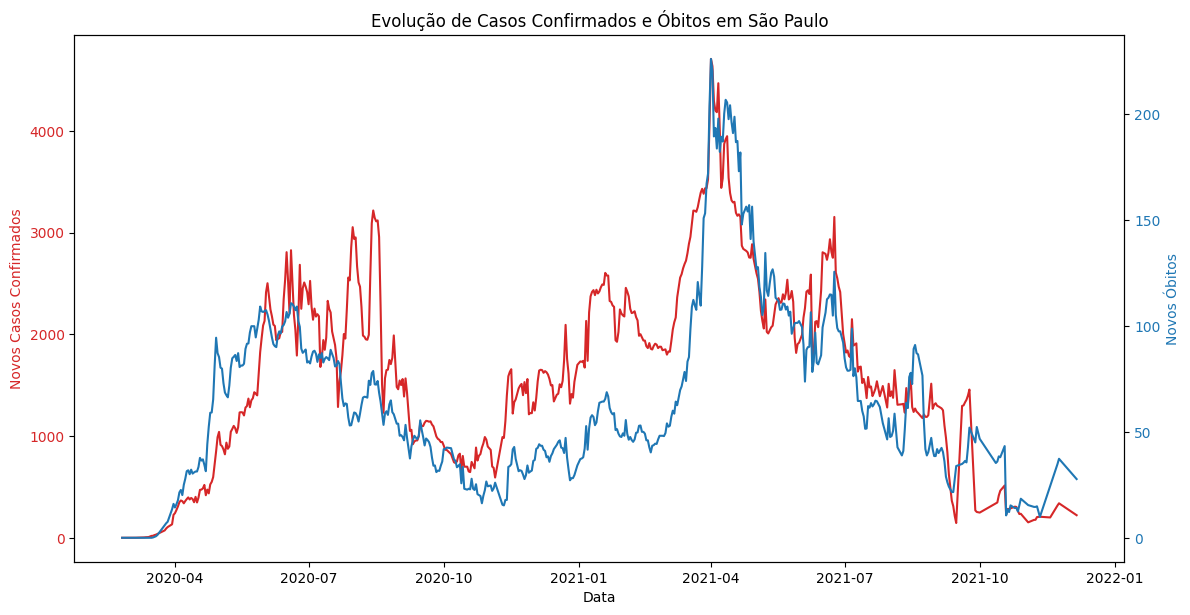

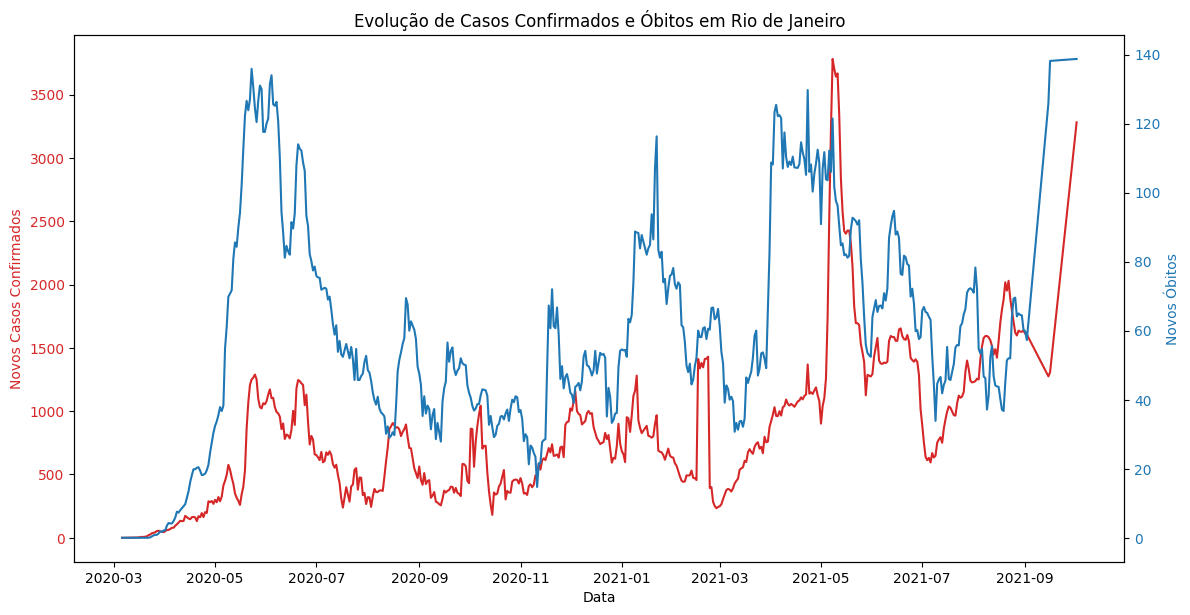

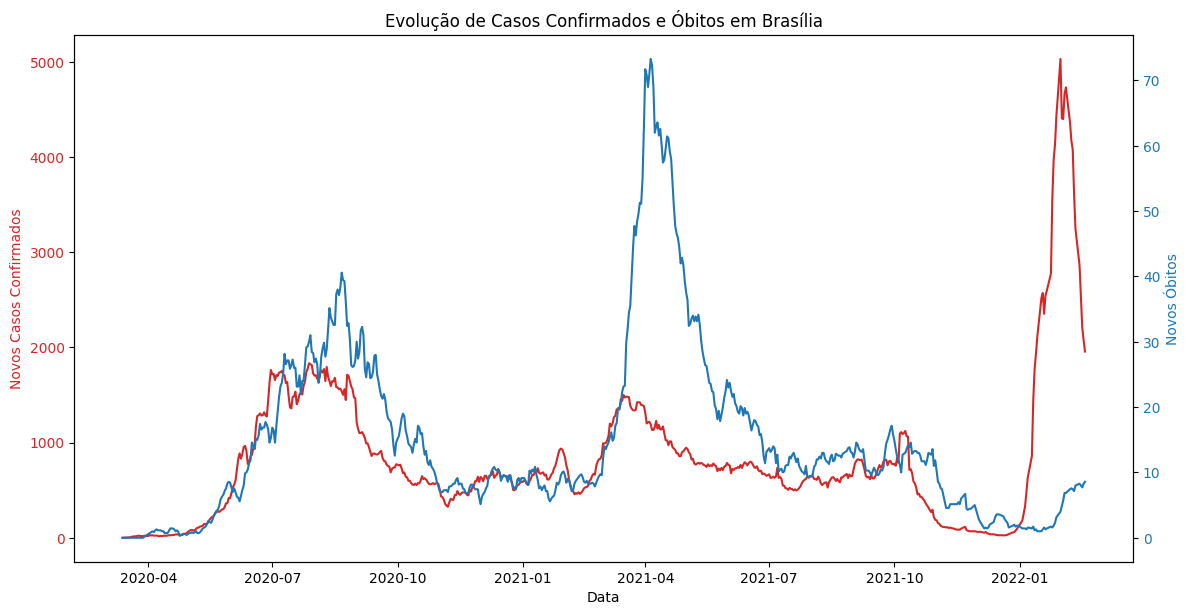

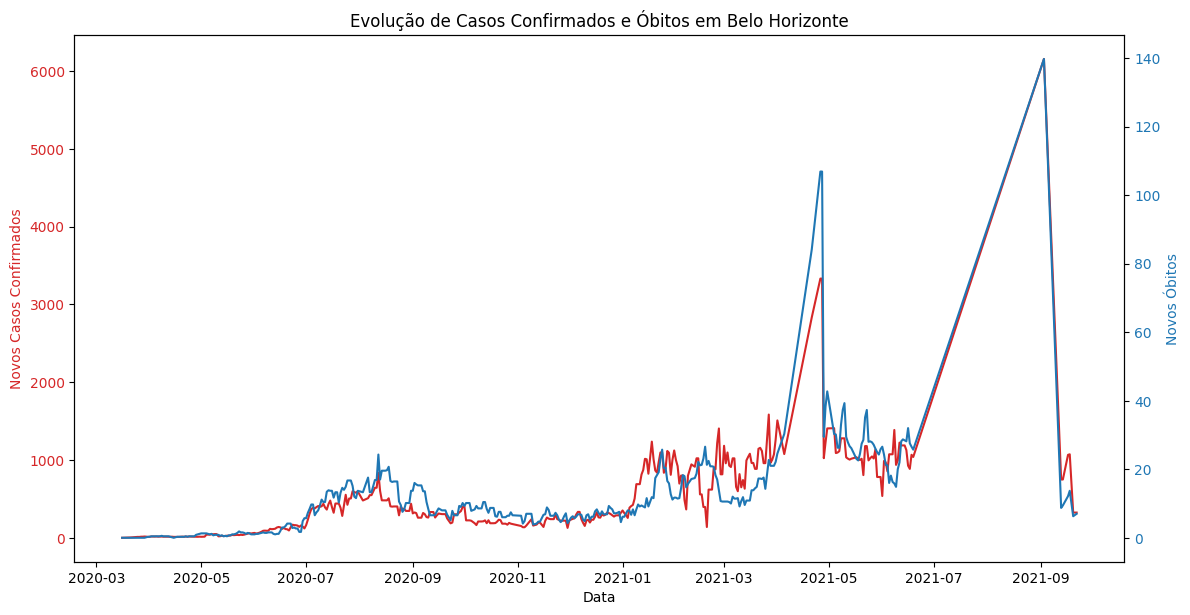

In [ ]:
"""
Será gerado um gráfico de linhas comparando o crescimento da variável new_confirmed_mm com o crescimento da variável new_deaths_mm.
"""

for city in data_filtered['city'].unique():
  fig, ax1 = plt.subplots(figsize=(12, 6))
  city_df = data_filtered[data_filtered['city'] == city]
  color = 'tab:red'
  ax1.set_xlabel('Data')
  ax1.set_ylabel('Novos Casos Confirmados', color=color)
  if len(city_df) > 1:
    ax1.plot(city_df.index, city_df['new_confirmed_mm'], color=color, label='Novos Casos Confirmados')
  else:
    str_index = city_df.index.strftime('%Y-%m-%d')
    ax1.plot(str_index, city_df['new_confirmed_mm'], color=color, label='Novos Casos Confirmados')
  ax1.tick_params(axis='y', labelcolor=color)
  ax2 = ax1.twinx()
  color = 'tab:blue'
  ax2.set_ylabel('Novos Óbitos', color=color)

  if len(city_df) > 1:
    ax2.plot(city_df.index, city_df['new_deaths_mm'], color=color, label='Novos Óbitos')
  else:
    str_index = city_df.index.strftime('%Y-%m-%d')
    ax2.plot(str_index, city_df['new_deaths_mm'], color=color, label='Novos Óbitos')
  ax2.tick_params(axis='y', labelcolor=color)
  fig.tight_layout()
  plt.title(f'Evolução de Casos Confirmados e Óbitos em {city}')
  plt.show()
  print("==================================================================================")

- Os gráficos abaixo representam os casos confirmados em proporção a cada 100.000 habitantes. Em análise geral observamos que proporcionalmente ao número de habitantes, as cidades analisadas se apresentaram regulares. Com picos apresentados numa mesma época de setembro de 2021, menos em Brasilia em que o pico foi em janeiro e fevereiro de 2022.

- Em seguida está representado por cada capital os números de óbitos por proporção a cada 100.000 habitantes, se apresentando muito similar aos números de casos.



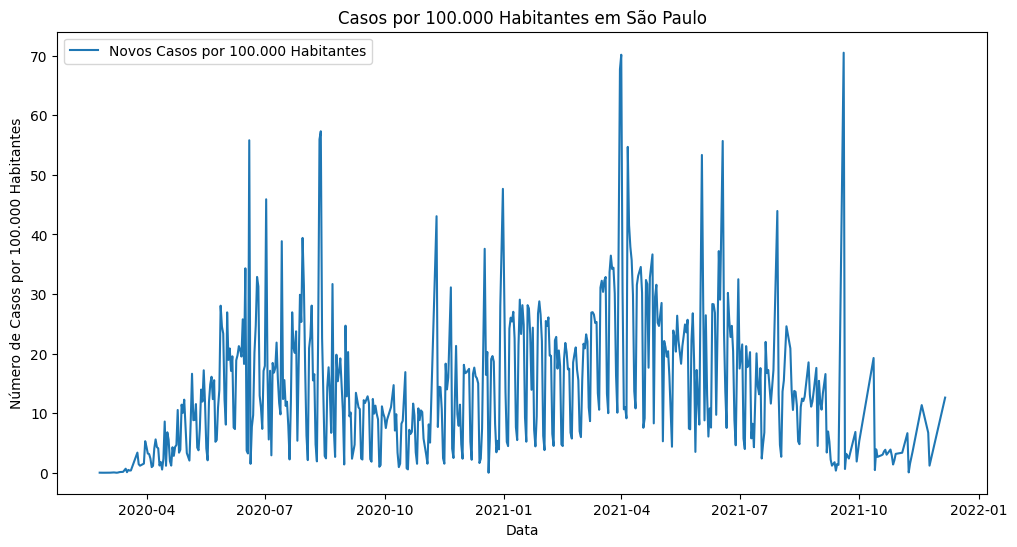

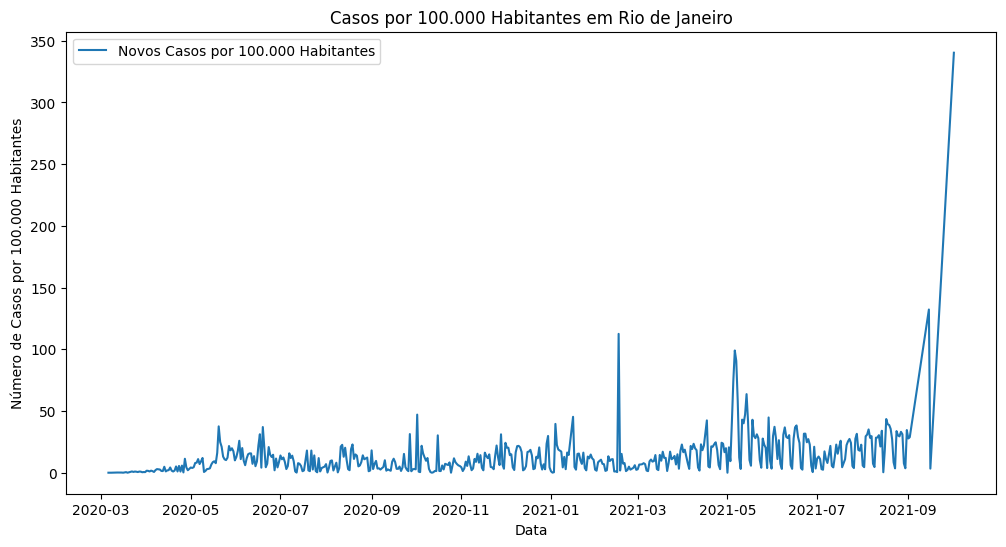

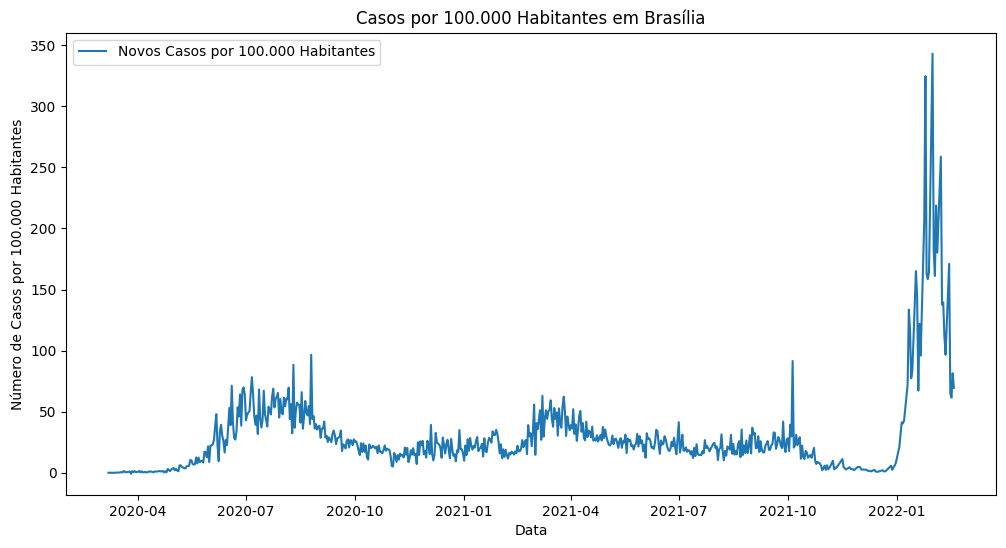

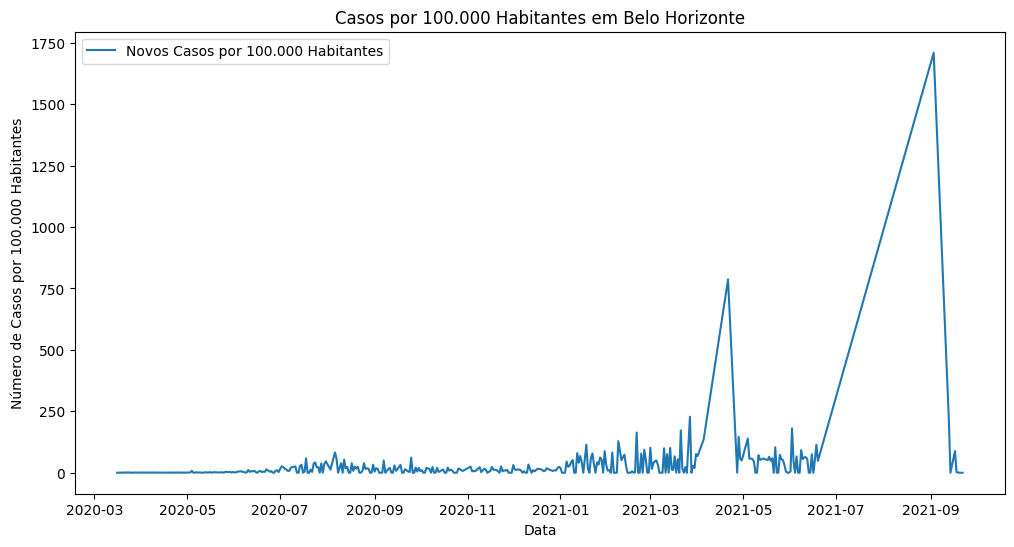

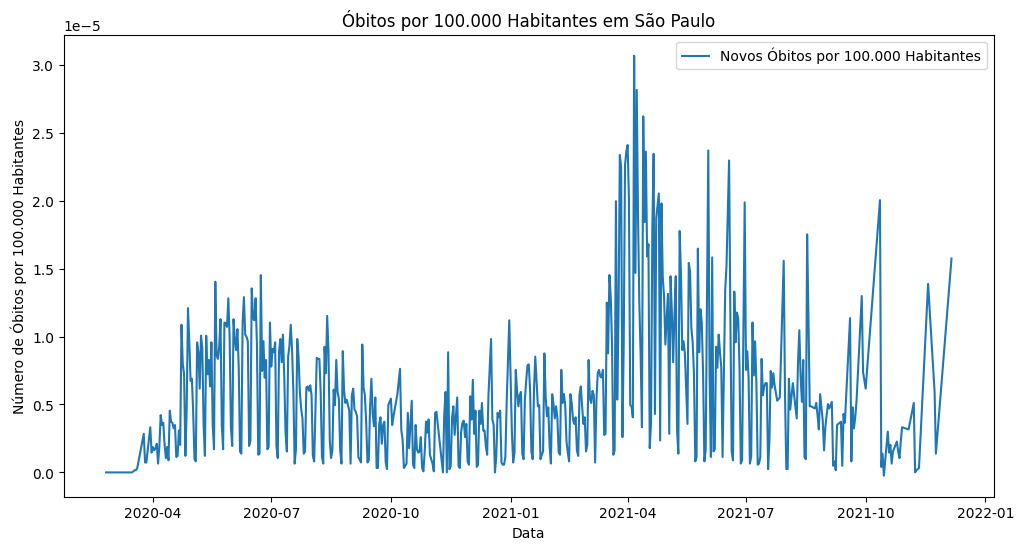

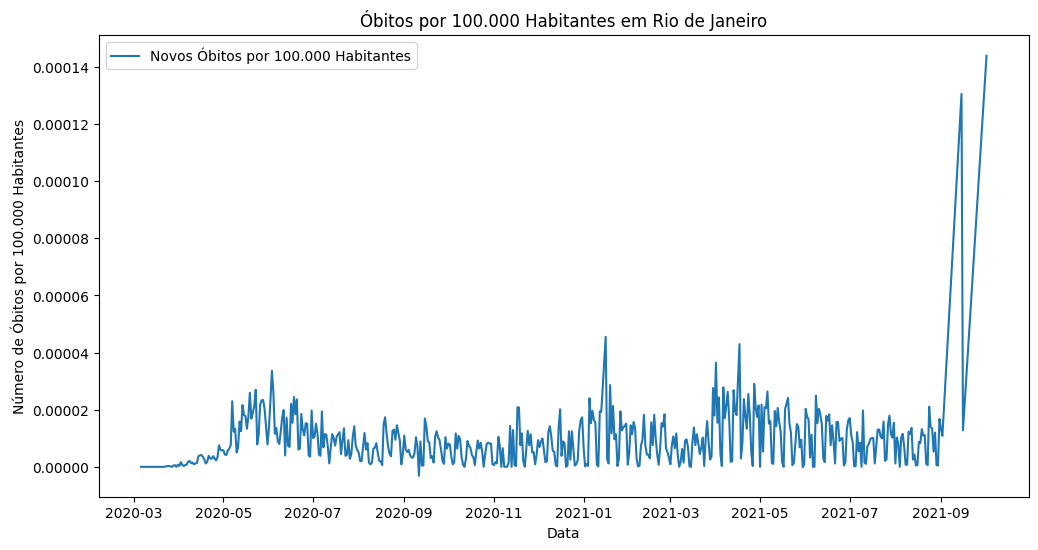

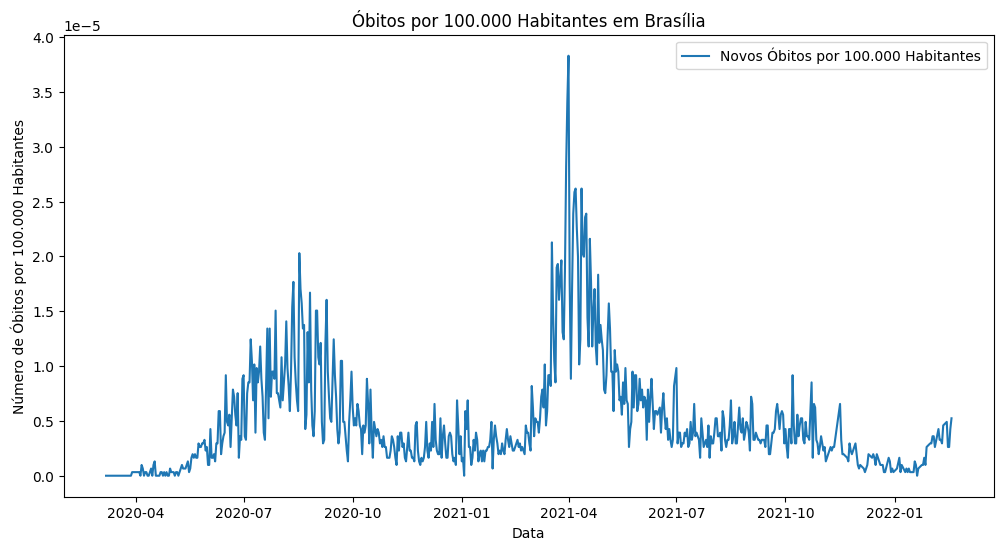

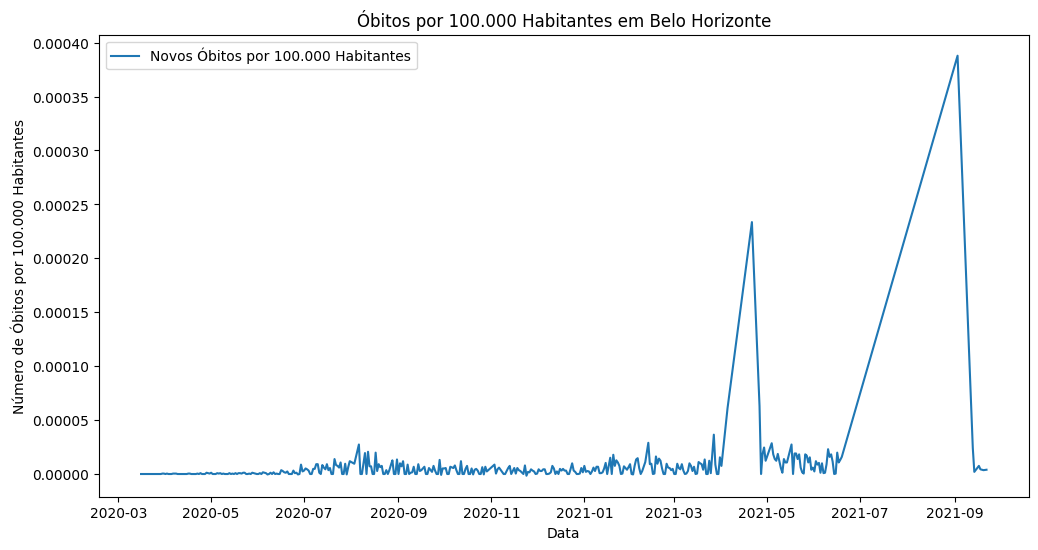

In [ ]:
"""
Será gerado um gráfico de comparação para o crescimento de casos e óbitos em relação a população de cada cidade.
"""

data_filtered['new_confirmed_per_capita'] = (data_filtered['new_confirmed'] / data_filtered['estimated_population']) * 100000
data_filtered['new_deaths_per_capita'] = (data_filtered['new_deaths'] / data_filtered['estimated_population']) * 100000
for city in data_filtered['city'].unique():
  plt.figure(figsize=(12, 6))
  city_df = data_filtered[data_filtered['city'] == city]
  if len(city_df) > 1:
    plt.plot(city_df.index, city_df['new_confirmed_per_capita'], label='Novos Casos por 100.000 Habitantes')
  else:
    str_index = city_df.index.strftime('%Y-%m-%d')
    plt.plot(str_index, city_df['new_confirmed_per_capita'], label='Novos Casos por 100.000 Habitantes')

  plt.title(f'Casos por 100.000 Habitantes em {city}')
  plt.xlabel('Data')
  plt.ylabel('Número de Casos por 100.000 Habitantes')
  plt.legend()
  plt.show()
  print("===========================================================================")



data_filtered['new_confirmed_per_capita'] = data_filtered['new_confirmed'] / data_filtered['estimated_population']
data_filtered['new_deaths_per_capita'] = data_filtered['new_deaths'] / data_filtered['estimated_population']
for city in data_filtered['city'].unique():
  plt.figure(figsize=(12, 6))
  city_df = data_filtered[data_filtered['city'] == city]
  if len(city_df) > 1:
    plt.plot(city_df.index, city_df['new_deaths_per_capita'], label='Novos Óbitos por 100.000 Habitantes')
  else:
    str_index = city_df.index.strftime('%Y-%m-%d')
    plt.plot(str_index, city_df['new_deaths_per_capita'], label='Novos Óbitos por 100.000 Habitantes')

  plt.title(f'Óbitos por 100.000 Habitantes em {city}')
  plt.xlabel('Data')
  plt.ylabel('Número de Óbitos por 100.000 Habitantes')
  plt.legend()
  plt.show()
  print("===========================================================================")

- Os gráficos abaixo apresentam como se comportaram as evoluções de casos após os períodos de lockdown e pós Lockdown em cada capital:

  - São Paulo: O lockdown realizado entre o mês de março e junho de 2020, controlaram os casos apenas entre esses períodos, após o fim deste período os número de casos tiveram uma alta constante, sendo controlados aproximadamente no mês 10-2020. Entre os meses de março a maio de 2021, houve novamente a necessidade de um novo lockdown pelos altos números de casos apresentados, após houve uma queda representativa nos casos.

  - Rio de Janeiro: O primeiro lockdown foi entre os meses de março e junho de 2020, apresentando baixo sucesso no controle de casos, disparando um pico dentro do período, após os casos de apresentaram constantes. Em abril de 2021, houve um novo lockdown, no qual manteve um numero constante após a alta dada no início do mês de abril, apresentando um pico significativo entre os meses de maio e junho.

  - Brasília: Em Brasília observa-se uma ineficiência do primeiro lockdown decretado, com um crescimento exponencial de casos após o pós-lockdown, no segundo período de lockdown, houve uma eficiência maior, onde os casos foram controlados no período, e tiveram significativa redução.

  - Belo Horizonte: Em Belo Horizonte, divido a falta de confiabilidade dos dados lançados, não podemos inferir com certeza se houve eficácia nas medidas de lockdown


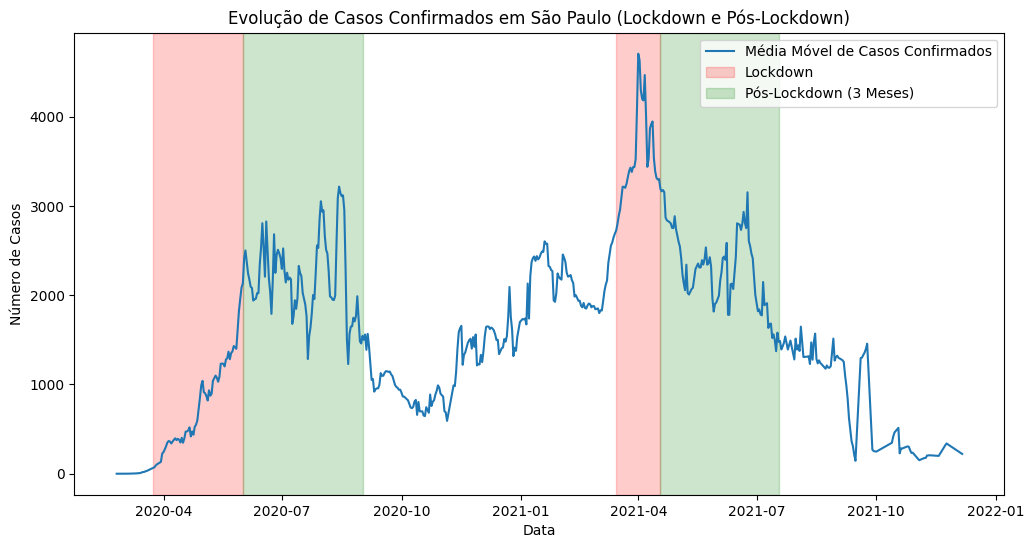

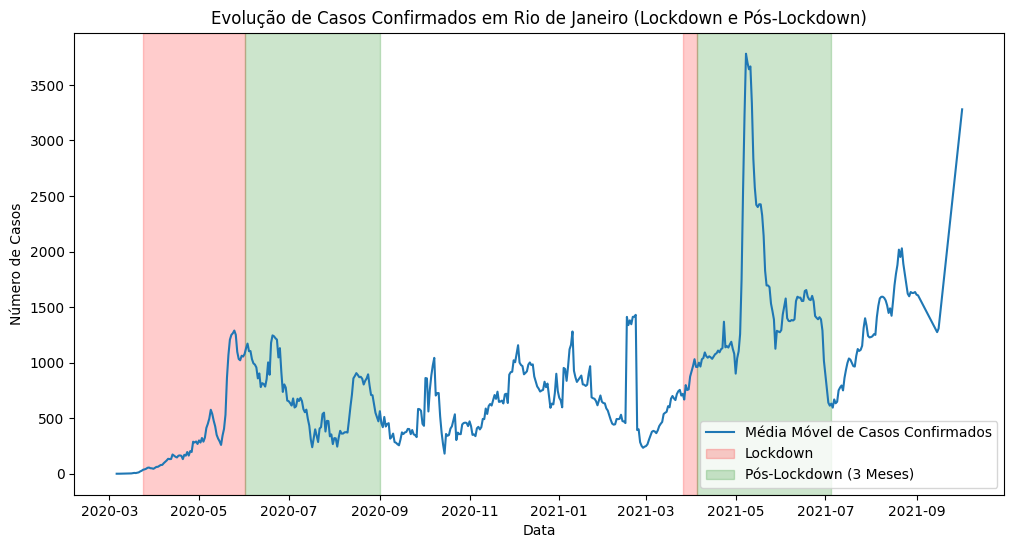

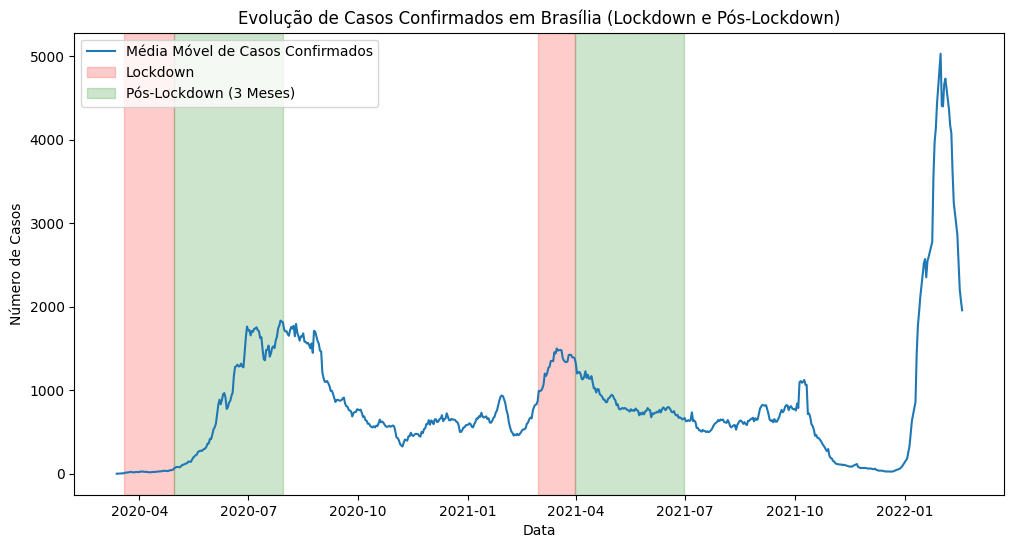

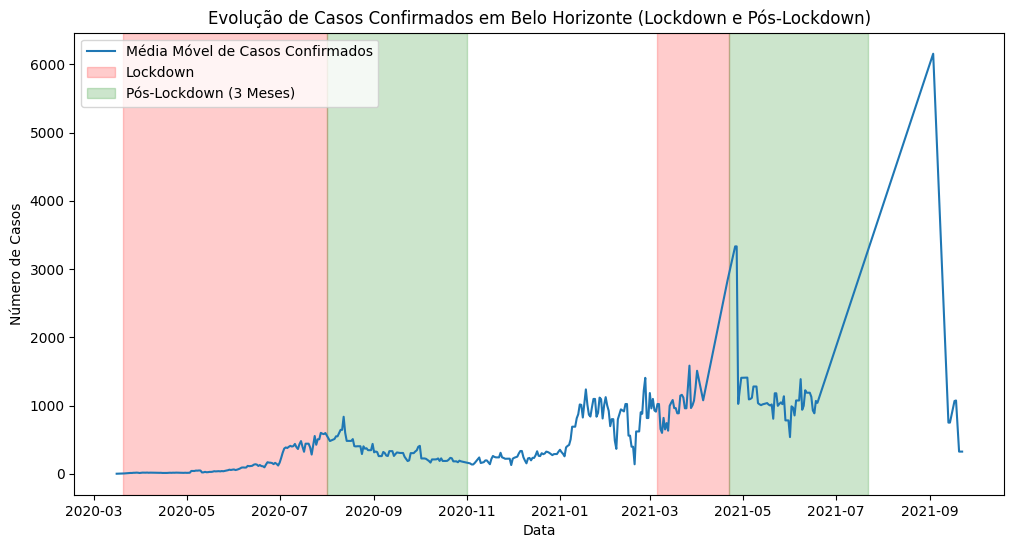

In [ ]:
"""
Será gerado um gráfico isolando os periódos de lockdown decretados em cada cidade.

"""


lockdown_periods = {
    'São Paulo': [('2020-03-24', '2020-06-01'), ('2021-03-15', '2021-04-18')],
    'Rio de Janeiro': [('2020-03-24', '2020-06-01'), ('2021-03-26', '2021-04-05')],
    'Brasília': [('2020-03-19', '2020-04-30'), ('2021-02-28', '2021-03-31')],
    'Belo Horizonte': [('2020-03-20', '2020-08-01'), ('2021-03-06', '2021-04-22')]
}

for city, periods in lockdown_periods.items():
    if city in data_filtered['city'].unique():
        plt.figure(figsize=(12, 6))
        city_df = data_filtered[data_filtered['city'] == city]

        if city_df.empty:
            print(f"Sem dados para {city}.")
            plt.close()
            continue

        if len(city_df) > 1:
            plt.plot(city_df.index, city_df['new_confirmed_mm'], label='Média Móvel de Casos Confirmados')
        else:
            str_index = city_df.index.strftime('%Y-%m-%d')
            plt.plot(str_index, city_df['new_confirmed_mm'], label='Média Móvel de Casos Confirmados')

        lockdown_label_added = False
        post_lockdown_label_added = False

        for start, end in periods:
            label_lockdown = 'Lockdown' if not lockdown_label_added else None
            plt.axvspan(start, end, color='red', alpha=0.2, label=label_lockdown)
            lockdown_label_added = True

            end_date = pd.to_datetime(end)
            post_start = end_date
            post_end = post_start + pd.DateOffset(months=3)

            label_post = 'Pós-Lockdown (3 Meses)' if not post_lockdown_label_added else None
            plt.axvspan(post_start, post_end, color='green', alpha=0.2, label=label_post)
            post_lockdown_label_added = True

        plt.title(f'Evolução de Casos Confirmados em {city} (Lockdown e Pós-Lockdown)')
        plt.xlabel('Data')
        plt.ylabel('Número de Casos')

        handles, labels = plt.gca().get_legend_handles_labels()
        by_label = dict(zip(labels, handles))
        plt.legend(by_label.values(), by_label.keys())

        plt.show()
        print("==================================================================")

- Os gráficos abaixo apresentam como se comportaram as evoluções de óbitos após os períodos de lockdown e pós Lockdown em cada capital:

  - São Paulo: Em São Paulo, observa-se uma crescente dos casos de óbitos nos períodos de lockdown, que surtiu efeito, pois vemos uma grande queda nos óbitos durante o período de relaxamento

  - Rio de Janeiro: O mesmo se pode observar no Rio de Janeiro, porem com picos de óbitos mais agressivos

  - Brasília: Já em Brasília, podemos ver uma crescente de óbitos nos períodos de relaxamento da primeira onde, mas no segundo decreto de lockdown, podemos ver uma grande redução de óbitos

  - Belo Horizonte: Com base nos dados disponibilizados de Brasília, não é possível inferir com precisão, devido a confiabilidade dos dados.

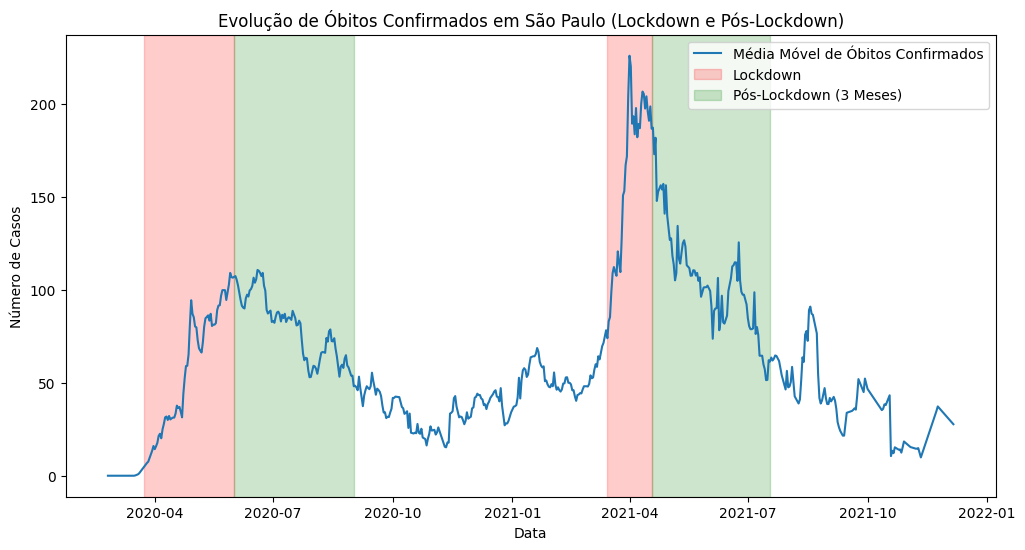

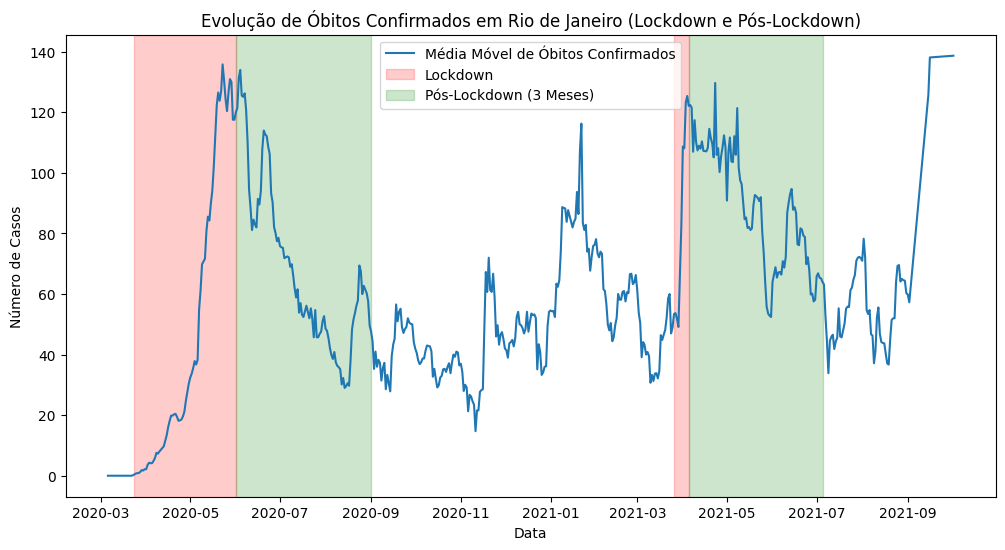

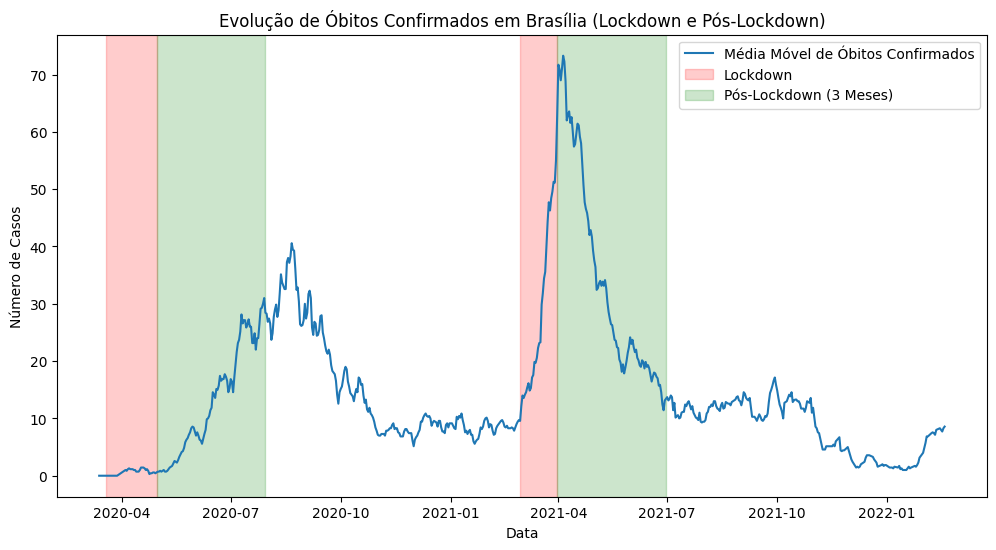

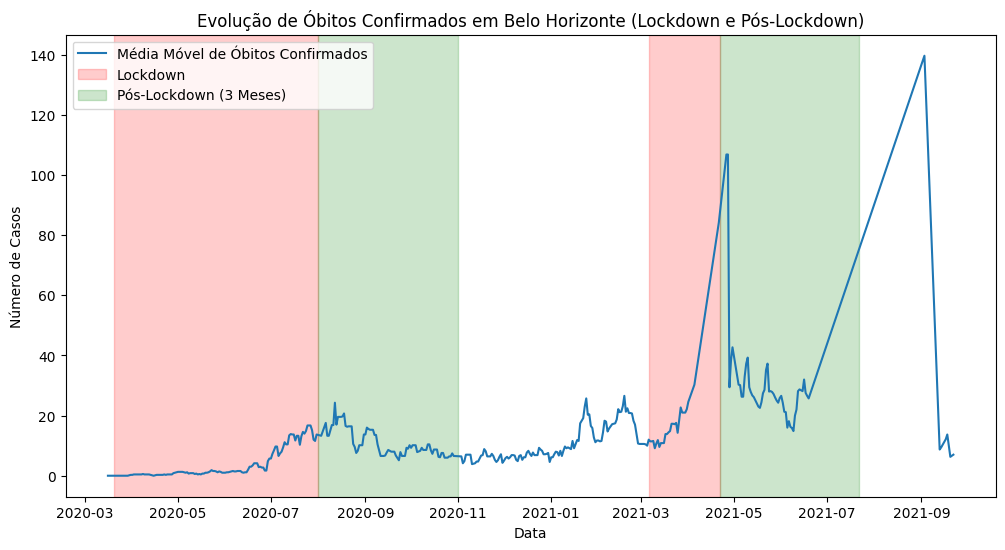

In [ ]:
"""
Será gerado um gráfico isolando os periódos de lockdown decretados em cada cidade.

"""
lockdown_periods = {
    'São Paulo': [('2020-03-24', '2020-06-01'), ('2021-03-15', '2021-04-18')],
    'Rio de Janeiro': [('2020-03-24', '2020-06-01'), ('2021-03-26', '2021-04-05')],
    'Brasília': [('2020-03-19', '2020-04-30'), ('2021-02-28', '2021-03-31')],
    'Belo Horizonte': [('2020-03-20', '2020-08-01'), ('2021-03-06', '2021-04-22')]
}

for city, periods in lockdown_periods.items():
    if city in data_filtered['city'].unique():
        plt.figure(figsize=(12, 6))
        city_df = data_filtered[data_filtered['city'] == city]

        if city_df.empty:
            print(f"Sem dados para {city}.")
            plt.close()
            continue

        if len(city_df) > 1:
            plt.plot(city_df.index, city_df['new_deaths_mm'], label='Média Móvel de Óbitos Confirmados')
        else:
            str_index = city_df.index.strftime('%Y-%m-%d')
            plt.plot(str_index, city_df['new_deaths_mm'], label='Média Móvel de Óbitos Confirmados')

        lockdown_label_added = False
        post_lockdown_label_added = False

        for start, end in periods:
            label_lockdown = 'Lockdown' if not lockdown_label_added else None
            plt.axvspan(start, end, color='red', alpha=0.2, label=label_lockdown)
            lockdown_label_added = True

            end_date = pd.to_datetime(end)
            post_start = end_date
            post_end = post_start + pd.DateOffset(months=3)

            label_post = 'Pós-Lockdown (3 Meses)' if not post_lockdown_label_added else None
            plt.axvspan(post_start, post_end, color='green', alpha=0.2, label=label_post)
            post_lockdown_label_added = True

        plt.title(f'Evolução de Óbitos Confirmados em {city} (Lockdown e Pós-Lockdown)')
        plt.xlabel('Data')
        plt.ylabel('Número de Casos')

        handles, labels = plt.gca().get_legend_handles_labels()
        by_label = dict(zip(labels, handles))
        plt.legend(by_label.values(), by_label.keys())

        plt.show()
        print("==================================================================")

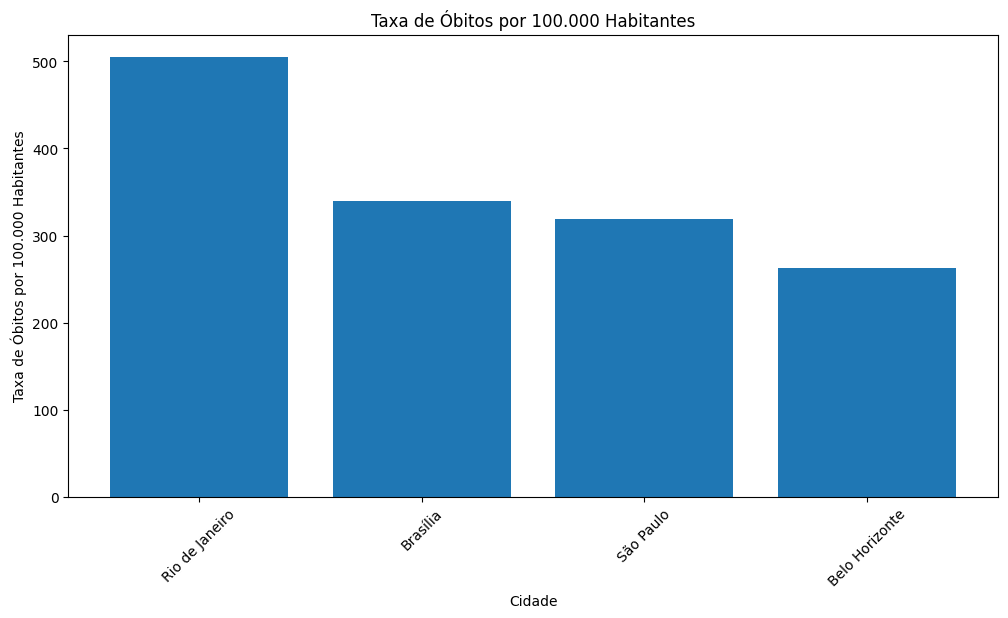

In [ ]:
"""
Será gerado um gráfico com a taxa de óbitos por 100.000 habitantes, verificando proporcionalmente.
"""

death_rate_df = data_filtered.groupby('city').agg({
    'last_available_deaths': 'max',
    'estimated_population': 'first'
}).reset_index()

death_rate_df['death_rate_100k'] = (death_rate_df['last_available_deaths'] / death_rate_df['estimated_population']) * 100000
death_rate_df = death_rate_df.sort_values(by='death_rate_100k', ascending=False)

plt.figure(figsize=(12, 6))
plt.bar(death_rate_df['city'], death_rate_df['death_rate_100k'])
plt.title('Taxa de Óbitos por 100.000 Habitantes')
plt.xlabel('Cidade')
plt.ylabel('Taxa de Óbitos por 100.000 Habitantes')
plt.xticks(rotation=45)
plt.show()

CONCLUSÃO:

Com base nas análises realizadas sobre a evolução da Covid-19 nas capitais São Paulo, Rio de Janeiro, Brasília e Belo Horizonte, é possível observar que, apesar de particularidades regionais e eventuais inconsistências nos registros, o comportamento da pandemia seguiu padrões semelhantes entre as capitais, refletindo os principais ciclos da crise sanitária no Brasil.

De forma geral, os primeiros picos de casos ocorreram entre junho e agosto de 2020, seguidos por uma breve estabilização e nova alta expressiva no início de 2021, coincidindo com períodos festivos como Natal, Ano Novo e Carnaval, quando as medidas de isolamento foram mais relaxadas. Esse comportamento demonstra a forte correlação entre o aumento de casos e a intensificação das interações sociais.

A capital São Paulo destacou-se como a mais afetada, tanto em número de casos quanto em óbitos, com a mortalidade acompanhando de perto o avanço das infecções. O Rio de Janeiro, embora tenha apresentado um padrão semelhante, mostrou maior descolamento proporcional entre casos e óbitos, sugerindo taxas de letalidade mais elevadas em determinados períodos. Já Brasília e Belo Horizonte apresentaram maior irregularidade nos dados, com possíveis erros de registro e inconsistências temporais — especialmente no caso de Belo Horizonte, onde picos abruptos indicam falhas de consolidação ou atrasos na notificação.

Quando os números são observados proporcionalmente à população, verifica-se que as quatro capitais mantiveram níveis semelhantes de incidência e mortalidade, com exceção de Brasília e Belo Horizonte, cujo pico ocorreu mais tardiamente, entre janeiro e fevereiro de 2022, possivelmente refletindo atrasos ou particularidades regionais na disseminação do vírus.

Quanto à eficácia das medidas de lockdown, os resultados mostram que as restrições tiveram impacto temporário, desacelerando os casos e óbitos apenas durante os períodos de vigência e pós-lockdown (3 meses). Após o esse período, houve retomada do crescimento, evidenciando a dificuldade de manter o controle sem continuidade das medidas e adesão social ampla. O segundo ciclo de lockdown, observado em 2021, apresentou melhor efeito em Brasília e São Paulo, com reduções mais consistentes nos casos e mortes, enquanto no Rio de Janeiro e Belo Horizonte os resultados foram menos expressivos, seja por menor aderência, seja por inconsistências nos dados.

Em síntese, as análises indicam que:

A pandemia seguiu ciclos de alta e queda relacionados a eventos sociais e períodos de restrição;

O comportamento dos óbitos acompanhou, em geral, o dos casos confirmados, com diferenças na proporção entre capitais;

Houve impacto positivo, porém temporário, das medidas de lockdown, especialmente quando aplicadas com maior rigor;

A qualidade e consistência dos dados variou entre as capitais, limitando a precisão de algumas inferências, sobretudo em Belo Horizonte e Brasília.

Esses resultados reforçam a importância da confiabilidade dos dados, da adoção contínua de políticas públicas de controle e da adesão da população às medidas preventivas, fatores essenciais para reduzir o impacto de crises sanitárias dessa magnitude.
